# Best Women Volleyball Players EDA & Visualization

In [1]:
import requests
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup

### Web Scraping

In [723]:
url="https://women.volleybox.net/players/ranking/2019"

html_content = requests.get(url).text
# Parse the html content
soup = BeautifulSoup(html_content, "html.parser")

In [724]:
links =soup.find_all('a')
a=[]
b=[]
for link in links:
    #print(link.text, link.get("href"))
    a.append(link.get("href"))
    b.append(link.text)
a;

In [726]:
players= a[64:124]
pl = list(dict.fromkeys(players))
pl;

In [738]:
names1 = b[64:124]
name = np.array(names1)
names = np.delete(name, np.argwhere(name == '\n '))
names;

In [728]:
len(pl)

30

In [729]:
cols = ['Ranking','Ranking in 2020','Nationality','Position','Birthdate','Height','Weight','Spike','Block','Dominant hand',
'Views','Added by']
len(cols)

12

In [730]:
result = pd.DataFrame(np.zeros((30, 12)), columns= cols)
result;

In [731]:
info_all=[]
for url in pl:
    html_content = requests.get(url).text
    soup = BeautifulSoup(html_content, "lxml")

    spans= soup.find_all( "span",{"class" : "info-data"}, href=False)
    for span in spans:
        info_all.append(span.get_text())

In [732]:
len(info_all)

340

### Editing some values

In [733]:
new_info = ['3','23','China','Outside Hitter','1994-11-29','198cm','78kg','327cm','305cm','Right','14032','Volleybox',
 '176','19', 'Brazil', 'Setter', '1989-03-03', '178cm', '68kg', '292cm', '285cm', "null", '5053', 'mvs',
 '31', '13', 'Brazil', 'Outside Hitter', '1994-05-19', '180cm', '65kg', '305cm', '289cm', 'Right', '19472', 'Volleybox',
 '28', '3', 'Serbia, Bosnia and Herzegovina', 'Opposite', '1997-03-08', '194cm', '84kg', '329cm', '310cm', 'Left', '1007631', 'Volleybox',
 '134', '2', 'Italy', 'Opposite', '1998-12-18', '190cm', '70kg', '336cm', '315cm', "Right", '9712', 'soidensir3',
 '23', '25', 'Dominican Republic', 'Outside Hitter', '1987-05-13', '188cm', '68kg', '315cm', '310cm', "Right", '7510', 'Volleybox',
 '180', "null", 'USA', 'Outside Hitter', '1992-06-25', '188cm', '75kg', '306cm', '300cm', "Right", '17779', 'Volleybox', 
 '1601', '1668', 'Japan', 'Outside Hitter', '2000-05-14', '173cm', '65kg', '300cm', "290cm", "Right", '4526', 'sitenoise',
 '621', '14', 'USA', 'Opposite', '1993-12-25', '191cm', '77kg', '316cm', '312cm', 'Left', '25397', 'marciovolley',
 '83', "null", 'Dominican Republic', 'Outside Hitter', '1996-09-11', '201cm', '83kg', '330cm', '320cm', "Right", '7819', 'soidensir3',
 '405', '4', 'Turkey', 'Libero', '1991-04-23', '168cm', '55kg', '250cm', '245cm', "null", '3058', 'airton13',
 '511', '75', 'China', 'Outside Hitter', '2000-02-19', '192cm', '78kg', '312cm', '300cm', "Right", '2084', 'airton13', 
 '562', "null", 'Cuba', 'Opposite', '1999-10-16', '194cm', '76kg', '320cm', '310cm', 'Right', '11418', 'Volleybox',
 '187','19', 'Brazil', 'Libero', '1985-03-01', '168cm', '60kg', '268cm', '257cm', "null", '4403', 'Volleybox',
 '229', '357', 'Brazil', 'Middle-blocker', '1991-07-26', '192cm', '81kg', '310cm', '297cm', "Right", '3508', 'Volleybox',
 '718', '1081', 'USA', 'Opposite', '1993-02-02', '196cm', '75kg', '315cm', '305cm', 'Left', '7064', 'soidensir3', 
 '677', "null", 'Dominican Republic', 'Middle-blocker', '1997-12-03', '190cm', '68kg', '305cm','280cm',"Right", '3904', 'sait864',
 '1211', '257', 'Brazil','Middle-blocker', '1996-11-24', '185cm','62kg', '293cm', '282cm', "Right", '2829', 'bbbsma',
 '329', '1081', 'USA', 'Middle-blocker', '1992-08-04', '191cm', '83kg', '306cm', '295cm', "Right", '4411', 'soidensir3',
 '119', '10', 'Russia', 'Middle-blocker', '1991-10-04', '196cm', '78kg', '315cm', '305cm', "Right", '23038', 'Volleybox',
 '48', '19', 'Brazil','Middle-blocker','1981-07-27', '192cm', '78kg', '315cm', '299cm', "Right", '3442', 'Volleybox',   
 '51', '6', 'Brazil', 'Middle-blocker', '1991-04-08', '183cm','73kg', '316cm', '309cm', "Right", '4274', 'Volleybox',
 '34', '235', 'Russia, Ukraine', 'Opposite', '1989-06-01', '196cm' ,'75kg','321cm', '310cm', "Right", '14442', 'Volleybox', 
 '58', '273','Serbia', 'Setter', '1984-08-06', '183cm', '68kg', '300cm', '293cm', "Right", '15711', 'Volleybox',
 '459', '24', 'Turkey', 'Outside Hitter', '2000-01-17', '194cm', '72kg', '307cm', '305cm', "Right", '5374', 'marciovolley',
 '57', "null", 'Turkey', 'Middle-blocker', '1987-06-22', '188cm', '74kg','315cm', '302cm', "Right", '6263', 'przemek16', 
 '598', '1837', 'Mexico','Outside Hitter','1994-11-22', '188cm', '58kg', '302cm', '283cm', "Right", '13570', 'marciovolley',
 '389', '219', 'USA', 'Setter', '1992-11-10', '177cm', '68kg', '289cm', '283cm', "Right", '4516', 'przemek16',
 '981', '75', 'China', 'Middle-blocker', '1997-07-14', '195cm', '75kg', '312cm', '300cm', "Right", '1527', 'marciovolley',
 '32', '650', 'USA', 'Outside Hitter', '1986-10-16', '186cm', '74kg', '302cm', '295cm', "Right", '5713', 'Volleybox']

In [734]:
for i in range(30):
    result.loc[i] = new_info[12*i: 12*i+12]
result;

In [737]:
result.shape

(30, 12)

In [739]:
result["Name"]= names
result.head()

,Ranking,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Views,Added by,Name
0,3,23,China,Outside Hitter,1994-11-29,198cm,78kg,327cm,305cm,Right,14032,Volleybox,Ting Zhu
1,176,19,Brazil,Setter,1989-03-03,178cm,68kg,292cm,285cm,null,5053,mvs,Macris Carneiro
2,31,13,Brazil,Outside Hitter,1994-05-19,180cm,65kg,305cm,289cm,Right,19472,Volleybox,Gabriela Guimarães
3,28,3,"Serbia, Bosnia and Herzegovina",Opposite,1997-03-08,194cm,84kg,329cm,310cm,Left,1007631,Volleybox,Tijana Bošković
4,134,2,Italy,Opposite,1998-12-18,190cm,70kg,336cm,315cm,Right,9712,soidensir3,Paola Egonu


In [740]:
cols = result.columns.tolist()
cols = ['Name','Ranking',
 'Ranking in 2020',
 'Nationality',
 'Position',
 'Birthdate',
 'Height',
 'Weight',
 'Spike',
 'Block',
 'Dominant hand',
  "Views", "Added by"
 ]
result = result[cols]
result;

# EDA

In [741]:
result["Birthdate"];

In [742]:
from datetime import datetime
date_of_birth = []
for i in range(30):
    date_of_birth.append(datetime.strptime(result["Birthdate"][i], "%Y-%m-%d"))
date_of_birth;

In [743]:
result["Birthdate"] = date_of_birth
result.head()

,Name,Ranking,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Views,Added by
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198cm,78kg,327cm,305cm,Right,14032,Volleybox
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178cm,68kg,292cm,285cm,null,5053,mvs
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180cm,65kg,305cm,289cm,Right,19472,Volleybox
3,Tijana Bošković,28,3,"Serbia, Bosnia and Herzegovina",Opposite,1997-03-08,194cm,84kg,329cm,310cm,Left,1007631,Volleybox
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190cm,70kg,336cm,315cm,Right,9712,soidensir3


In [744]:
from datetime import date 
today = date.today()

ages=[]
for i in range(30):
    ages.append(today.year - date_of_birth[i].year - ((today.month, today.day) < (date_of_birth[i].month, date_of_birth[i].day)))

ages;

In [745]:
result["Age"]= ages
result.head()

,Name,Ranking,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Views,Added by,Age
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198cm,78kg,327cm,305cm,Right,14032,Volleybox,25
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178cm,68kg,292cm,285cm,null,5053,mvs,31
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180cm,65kg,305cm,289cm,Right,19472,Volleybox,25
3,Tijana Bošković,28,3,"Serbia, Bosnia and Herzegovina",Opposite,1997-03-08,194cm,84kg,329cm,310cm,Left,1007631,Volleybox,23
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190cm,70kg,336cm,315cm,Right,9712,soidensir3,21


In [746]:
result = result.replace(to_replace='Serbia, Bosnia and Herzegovina', value='Serbia', regex=True)

In [747]:
result = result.rename(columns= {"Ranking": "Ranking All"})
result.columns

Index(['Name', 'Ranking All', 'Ranking in 2020', 'Nationality', 'Position',
       'Birthdate', 'Height', 'Weight', 'Spike', 'Block', 'Dominant hand',
       'Views', 'Added by', 'Age'],
      dtype='object')

## Visualization

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

In [697]:
result["Ranking in 2020"]= result["Ranking in 2020"].replace(to_replace='null', value=0, regex=True)

In [698]:
result[["Ranking All", "Ranking in 2020"]]= result[["Ranking All", "Ranking in 2020"]].astype(int)

In [699]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
Name               30 non-null object
Ranking All        30 non-null int32
Ranking in 2020    30 non-null int32
Nationality        30 non-null object
Position           30 non-null object
Birthdate          30 non-null datetime64[ns]
Height             30 non-null object
Weight             30 non-null object
Spike              30 non-null object
Block              30 non-null object
Dominant hand      30 non-null object
Views              30 non-null object
Added by           30 non-null object
Age                30 non-null int64
dtypes: datetime64[ns](1), int32(2), int64(1), object(10)
memory usage: 3.2+ KB


In [655]:
res = result.drop(["Added by", "Views"], axis=1)
res.head()

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198cm,78kg,327cm,305cm,Right,25
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178cm,68kg,292cm,285cm,null,31
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180cm,65kg,305cm,289cm,Right,25
3,Tijana Bošković,28,3,Serbia,Opposite,1997-03-08,194cm,84kg,329cm,310cm,Left,23
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190cm,70kg,336cm,315cm,Right,21


In [656]:
import re
r = re.compile("([0-9]+)([a-zA-Z]+)")
nums1= []
nums2= []
nums3=[]
nums4=[]
for i in range(30):
    nums1.append(r.match(res["Height"][i]).group(1))
    nums2.append(r.match(res["Weight"][i]).group(1))
    nums3.append(r.match(res["Spike"][i]).group(1))
    nums4.append(r.match(res["Block"][i]).group(1))
res["Height"]=nums1
res["Weight"]=nums2
res["Spike"]=nums3
res["Block"]=nums4
res.head()

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,25
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,null,31
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,25
3,Tijana Bošković,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,23
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,21


In [657]:
res[["Height","Weight","Spike","Block"]] = res[["Height","Weight","Spike","Block"]].astype(int)
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 12 columns):
Name               30 non-null object
Ranking All        30 non-null int32
Ranking in 2020    30 non-null int32
Nationality        30 non-null object
Position           30 non-null object
Birthdate          30 non-null datetime64[ns]
Height             30 non-null int32
Weight             30 non-null int32
Spike              30 non-null int32
Block              30 non-null int32
Dominant hand      30 non-null object
Age                30 non-null int64
dtypes: datetime64[ns](1), int32(6), int64(1), object(4)
memory usage: 2.2+ KB


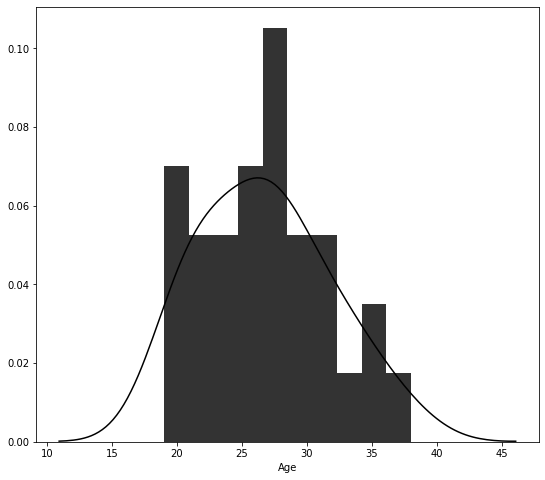

In [617]:
plt.figure(figsize=(9, 8))
sns.distplot(result['Age'], color='k', bins=10, hist_kws={'alpha': 0.8})

In [658]:
res["Ranking 2019"] = np.array(res.index+1)
res.head()

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age,Ranking 2019
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,25,1
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,null,31,2
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,25,3
3,Tijana Bošković,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,23,4
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,21,5


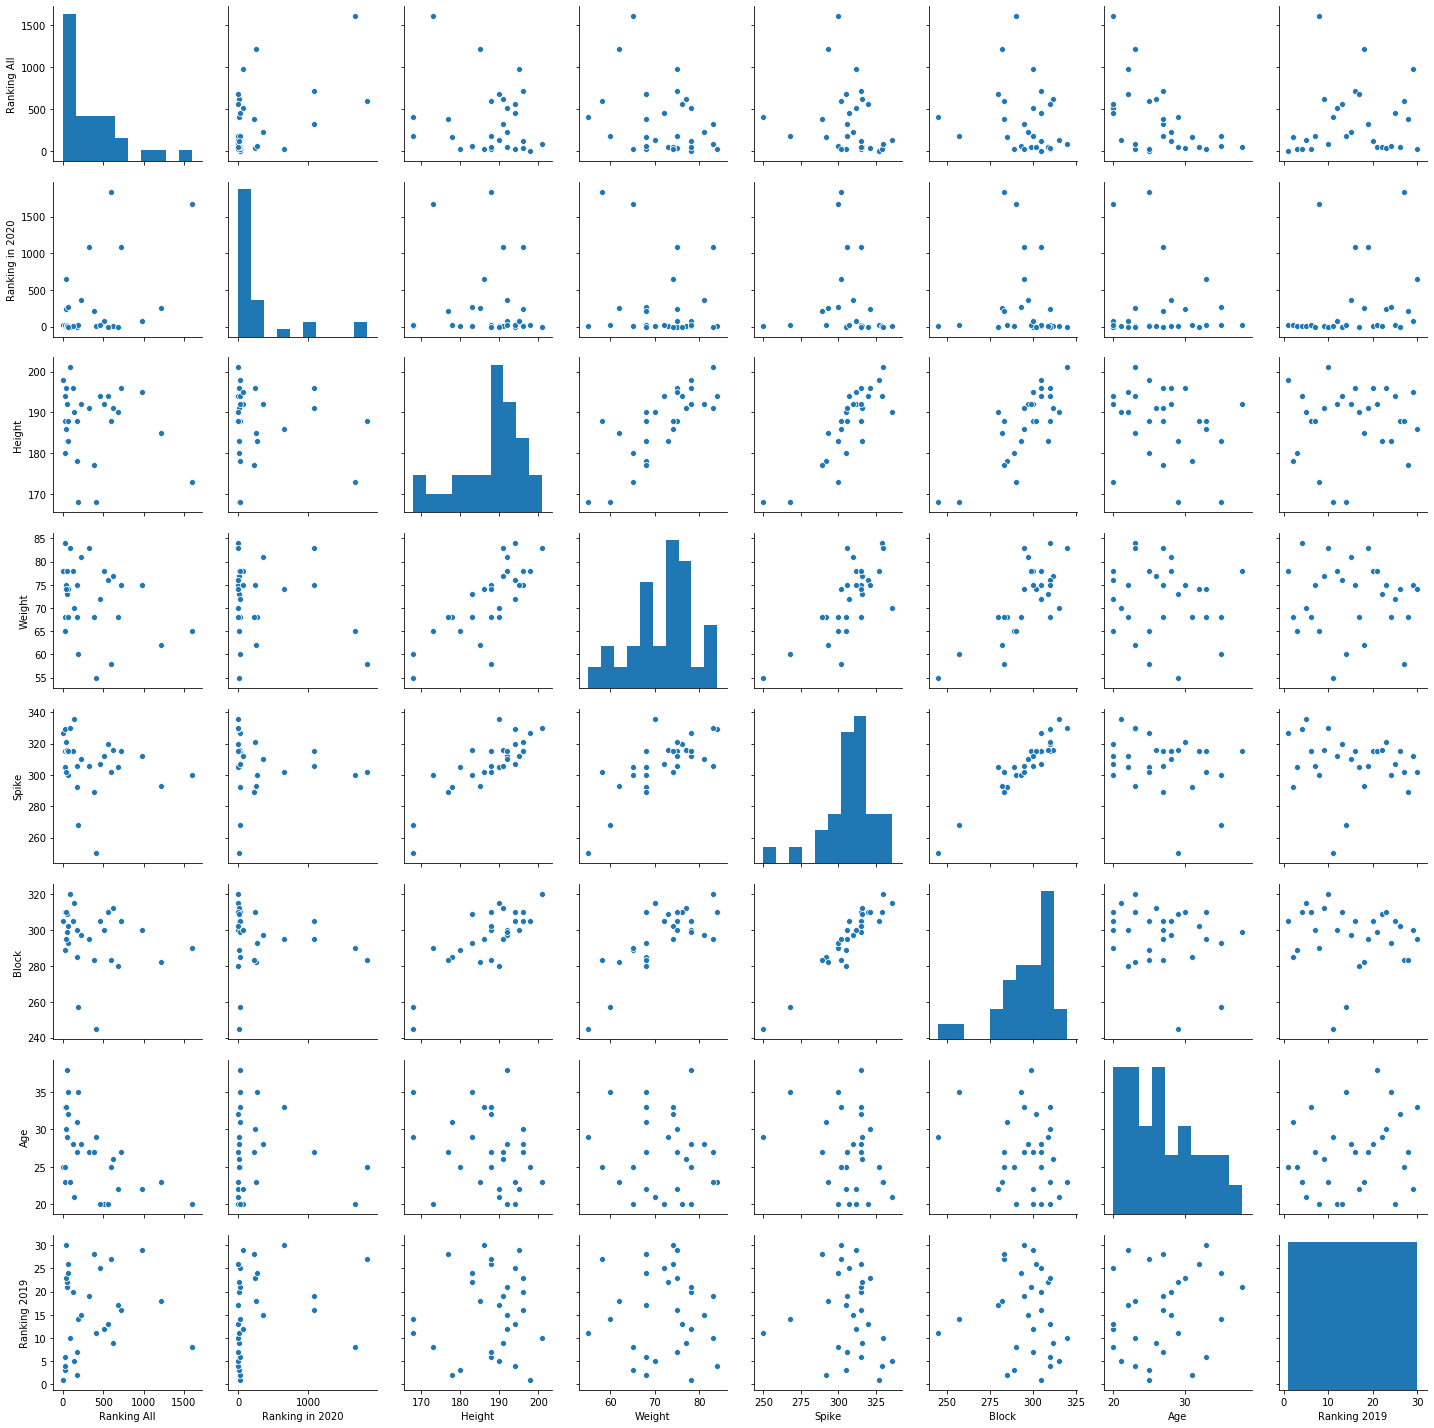

In [660]:
sns.pairplot(data=res)

In [659]:
corr = res.corr()
corr

,Ranking All,Ranking in 2020,Height,Weight,Spike,Block,Age,Ranking 2019
Ranking All,1.000000,0.490108,-0.164936,-0.304236,-0.223509,-0.224581,-0.546665,0.096672
Ranking in 2020,0.490108,1.000000,-0.112572,-0.205910,-0.103460,-0.135307,-0.113801,0.233354
Height,-0.164936,-0.112572,1.000000,0.770036,0.834334,0.799681,-0.293090,0.068945
Weight,-0.304236,-0.205910,0.770036,1.000000,0.731490,0.755632,-0.109657,-0.046298
Spike,-0.223509,-0.103460,0.834334,0.731490,1.000000,0.946269,-0.295521,-0.137786
Block,-0.224581,-0.135307,0.799681,0.755632,0.946269,1.000000,-0.234066,-0.080707
Age,-0.546665,-0.113801,-0.293090,-0.109657,-0.295521,-0.234066,1.000000,0.225176
Ranking 2019,0.096672,0.233354,0.068945,-0.046298,-0.137786,-0.080707,0.225176,1.000000


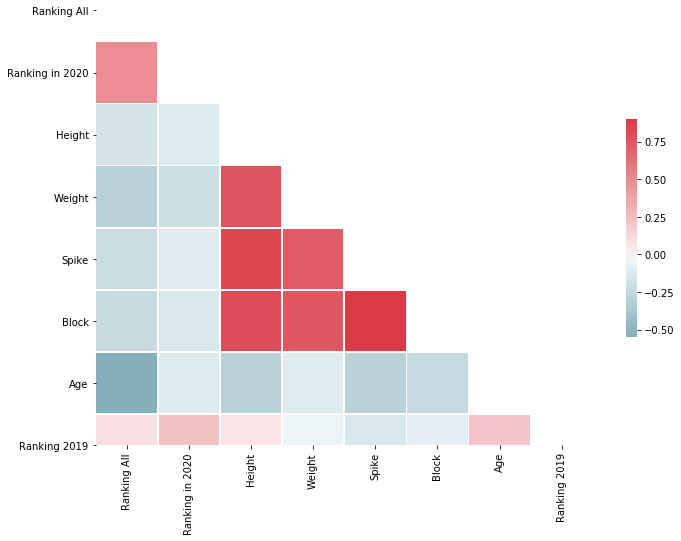

In [661]:
#corr matrix
mask = np.triu(np.ones_like(corr, dtype=np.bool))
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 8))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [748]:
points= []

url="https://women.volleybox.net/players/ranking/2019"
html_content = requests.get(url).text
soup = BeautifulSoup(html_content, "lxml")

spans= soup.find_all( "span",{"class" : "bolded-points"}, href=False)
for span in spans:
        points.append(span.string)
points;

In [749]:
points2 = []
for i in range(30):
    points2.append([line for line in points[i].replace(" ", "").split('\n') if line.strip() != ''][0])
points2;

In [662]:
res["Points"] = points2
points3= []
for i in range(30):
    points3.append(re.findall("\d+\.\d+", res["Points"][i])[0])

res["Points"] = points3
res.head()

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age,Ranking 2019,Points
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,25,1,1190.00
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,null,31,2,833.00
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,25,3,788.00
3,Tijana Bošković,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,23,4,630.50
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,21,5,597.00


In [663]:
res["Points"] = res["Points"].astype(float)
res.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 14 columns):
Name               30 non-null object
Ranking All        30 non-null int32
Ranking in 2020    30 non-null int32
Nationality        30 non-null object
Position           30 non-null object
Birthdate          30 non-null datetime64[ns]
Height             30 non-null int32
Weight             30 non-null int32
Spike              30 non-null int32
Block              30 non-null int32
Dominant hand      30 non-null object
Age                30 non-null int64
Ranking 2019       30 non-null int64
Points             30 non-null float64
dtypes: datetime64[ns](1), float64(1), int32(6), int64(2), object(4)
memory usage: 2.7+ KB


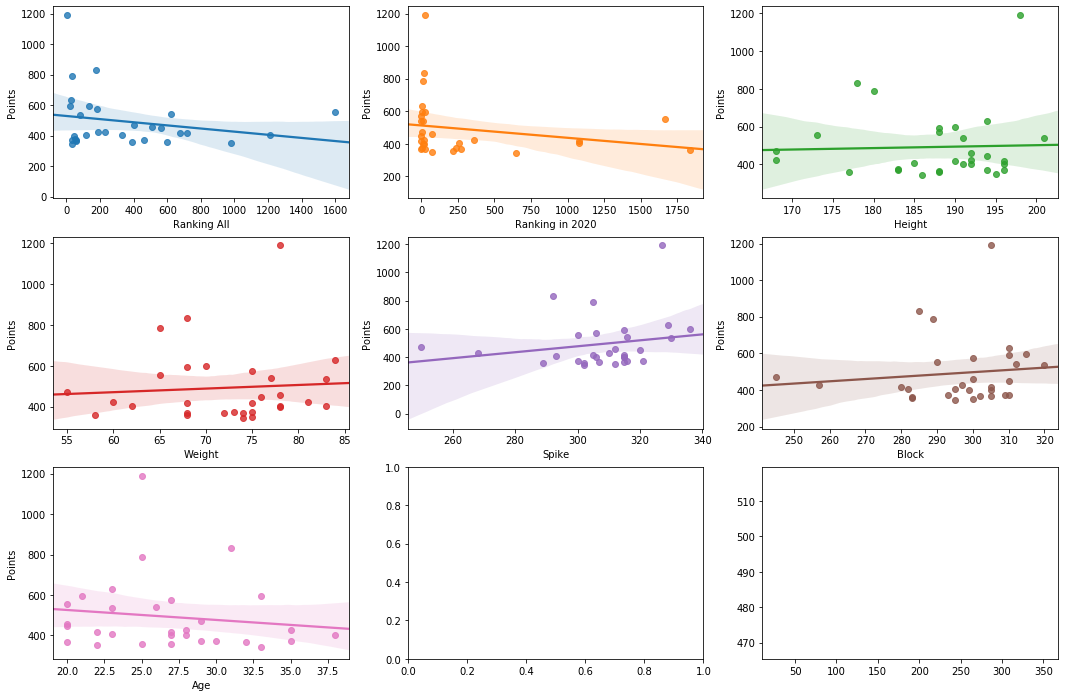

In [665]:
features_to_analyse = ['Ranking All', 'Ranking in 2020','Height', 'Weight', 'Spike', 'Block','Age','Points']
fig, ax = plt.subplots(round(len(features_to_analyse) / 3), 3, figsize = (18, 12))
for i, ax in enumerate(fig.axes):
    if i < len(features_to_analyse) - 1:
        sns.regplot(x=features_to_analyse[i],y='Points', data=res[features_to_analyse], ax=ax)

In [666]:
res[res["Position"]=="Opposite"].groupby("Dominant hand")["Points"].sum()

Dominant hand
Left     1587.7
Right    1417.0
Name: Points, dtype: float64

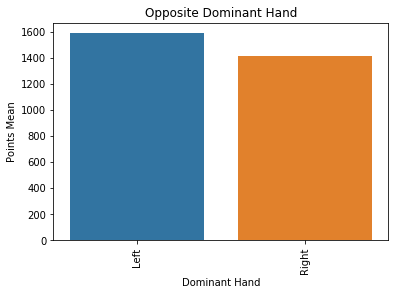

In [667]:
sns.barplot(x=res[res["Position"]=="Opposite"].groupby("Dominant hand")["Points"].sum().index,y=res[res["Position"]=="Opposite"].groupby("Dominant hand")["Points"].sum())
plt.xlabel('Dominant Hand')
plt.ylabel("Points Mean")
plt.xticks(rotation=90)
plt.title("Opposite Dominant Hand")

plt.show()

In [668]:
res[res["Position"]=="Opposite"]

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age,Ranking 2019,Points
3,Tijana Bošković,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,23,4,630.5
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,21,5,597.0
8,Andrea Drews,621,14,USA,Opposite,1993-12-25,191,77,316,312,Left,26,9,540.2
12,Melissa Vargas,562,0,Cuba,Opposite,1999-10-16,194,76,320,310,Right,20,13,447.0
15,Karsta Lowe,718,1081,USA,Opposite,1993-02-02,196,75,315,305,Left,27,16,417.0
22,Nataliya Goncharova,34,235,"Russia, Ukraine",Opposite,1989-06-01,196,75,321,310,Right,30,23,373.0


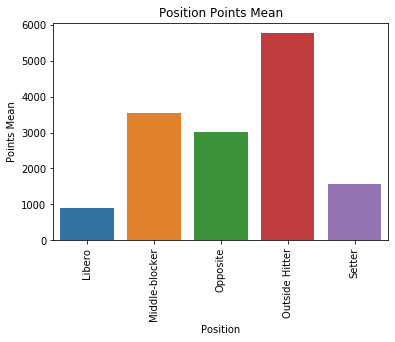

In [232]:
sns.barplot(x=res.groupby("Position")["Points"].sum().index,y=res.groupby("Position")["Points"].sum())
plt.xlabel('Position')
plt.ylabel("Points Mean")
plt.xticks(rotation=90)
plt.title("Position Points Mean")

plt.show()

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

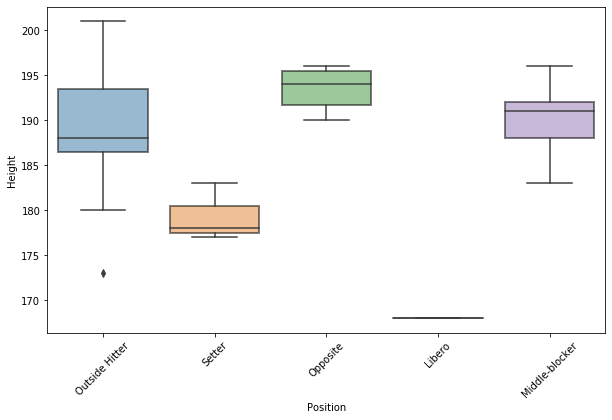

In [237]:
plt.figure(figsize = (10, 6))
ax = sns.boxplot(x='Position', y='Height', data=res)
plt.setp(ax.artists, alpha=.5, linewidth=2, edgecolor="k")
plt.xticks(rotation=45)

In [618]:
from scipy import stats

hitter = res[res["Position"]=="Outside Hitter"]
z = np.abs(stats.zscore(hitter["Height"]))


In [253]:
hitter["Height"][(z > 2)]

7    173
Name: Height, dtype: int32

In [254]:
hitter.loc[7,:]

Name                     Mayu Ishikawa
Ranking                           1601
Ranking in 2020                   1668
Nationality                      Japan
Position                Outside Hitter
Birthdate          2000-05-14 00:00:00
Height                             173
Weight                              65
Spike                              300
Block                              290
Dominant hand                    Right
Age                                 19
Ranking 2019                         8
Points                          553.25
Name: 7, dtype: object

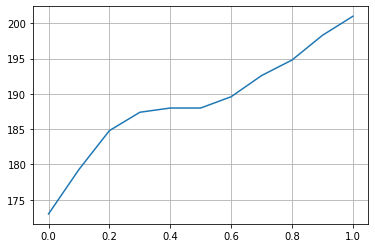

In [257]:
a = hitter["Height"].quantile([0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
plt.grid()
plt.plot(a)

In [250]:
a

0.0    173.0
0.1    179.3
0.2    184.8
0.3    187.4
0.4    188.0
0.5    188.0
0.6    189.6
0.7    192.6
0.8    194.8
0.9    198.3
1.0    201.0
Name: Height, dtype: float64

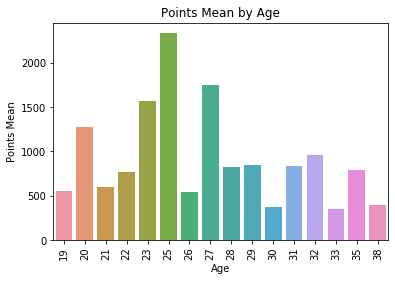

In [258]:
sns.barplot(x=res.groupby("Age")["Points"].sum().index,y=res.groupby("Age")["Points"].sum())
plt.xlabel('Age')
plt.ylabel("Points Mean")
plt.xticks(rotation=90)
plt.title("Points Mean by Age")

plt.show()

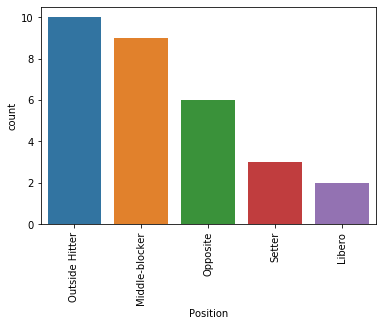

In [265]:
sns.countplot(res["Position"], order = res["Position"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

In [269]:
p = res["Position"].value_counts()
p

Outside Hitter    10
Middle-blocker     9
Opposite           6
Setter             3
Libero             2
Name: Position, dtype: int64

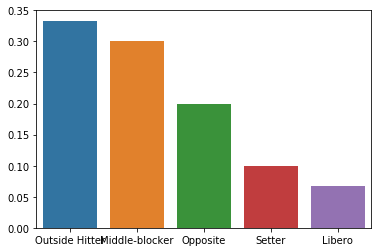

In [273]:
probabilities = res["Position"].value_counts(normalize=True)    
sns.barplot(probabilities.index, probabilities.values)

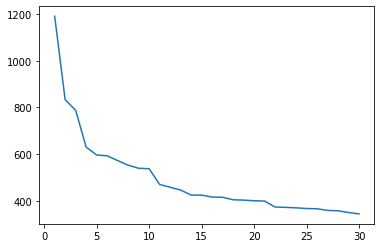

In [276]:
plt.plot("Ranking 2019", "Points", data=res)

In [283]:
z = np.abs(stats.zscore(res["Ranking"]))
res["Ranking"][(z > 2)]

7     1601
17    1211
Name: Ranking, dtype: int32

In [286]:
z = np.abs(stats.zscore(res["Ranking in 2020"]))
res["Ranking in 2020"][(z > 2)]

7     1668
26    1837
Name: Ranking in 2020, dtype: int32

In [669]:
#iskikawa :)))
res.loc[[7,17,26],:]

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age,Ranking 2019,Points
7,Mayu Ishikawa,1601,1668,Japan,Outside Hitter,2000-05-14,173,65,300,290,Right,20,8,553.25
17,Mayany Souza,1211,257,Brazil,Middle-blocker,1996-11-24,185,62,293,282,Right,23,18,405.50
26,Samantha Bricio,598,1837,Mexico,Outside Hitter,1994-11-22,188,58,302,283,Right,25,27,360.00


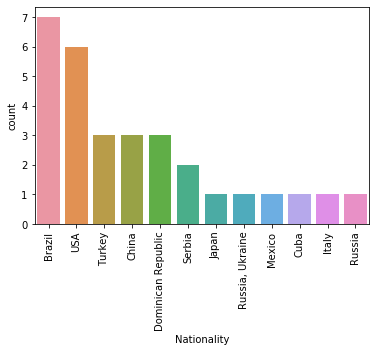

In [670]:
sns.countplot(res["Nationality"], order = res["Nationality"].value_counts().index)
plt.xticks(rotation=90)
plt.show()

### Adding new information

In [751]:
url = "https://www.the-sports.org/volleyball-fivb-world-ranking-women-s3-c335-l0.html"
html = requests.get(url)
# Parse the html content
soup = BeautifulSoup(html.content, "html.parser")  


In [752]:
table = soup.find("table", {"class" : "table-style-2"})
table;

In [753]:
len(points)

30

In [754]:
links = table.find_all('a')
links;

In [756]:
country=[]
for link in links:
    country.append(link.get("title"))
country;

In [757]:
points = []
for i in range(len(country)):
    points.append(table.find_all("td")[3*i+2].string)
points;

In [758]:
country_points = pd.DataFrame(country)
country_points["Points"]= points
country_points.columns = ["Country", "Country Point"]
country_points;

In [759]:
res2= pd.merge(left=res, right=country_points,how= "left", left_on='Nationality', right_on='Country')
res2.head()

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age,Ranking 2019,Points,Country,Country Point
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,25,1,1190.0,China,320
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,null,31,2,833.0,Brazil,220
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,25,3,788.0,Brazil,220
3,Tijana Bošković,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,23,4,630.5,Serbia,252
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,21,5,597.0,Italy,165


In [760]:
res2= res2.drop("Country", axis=1)

In [761]:
res2["Country Point"]= res2["Country Point"].astype(float)
res2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30 entries, 0 to 29
Data columns (total 15 columns):
Name               30 non-null object
Ranking All        30 non-null int32
Ranking in 2020    30 non-null int32
Nationality        30 non-null object
Position           30 non-null object
Birthdate          30 non-null datetime64[ns]
Height             30 non-null int32
Weight             30 non-null int32
Spike              30 non-null int32
Block              30 non-null int32
Dominant hand      30 non-null object
Age                30 non-null int64
Ranking 2019       30 non-null int64
Points             30 non-null float64
Country Point      23 non-null float64
dtypes: datetime64[ns](1), float64(2), int32(6), int64(2), object(4)
memory usage: 3.0+ KB


In [764]:
res2["Country Point"] = res2["Country Point"].fillna(res2["Country Point"].mean())
res2["Country Point"].isnull().sum()

0

In [765]:
res2.corr()

,Ranking All,Ranking in 2020,Height,Weight,Spike,Block,Age,Ranking 2019,Points,Country Point
Ranking All,1.000000,0.490108,-0.164936,-0.304236,-0.223509,-0.224581,-0.546665,0.096672,-0.221724,-0.031952
Ranking in 2020,0.490108,1.000000,-0.112572,-0.205910,-0.103460,-0.135307,-0.113801,0.233354,-0.207775,-0.168535
Height,-0.164936,-0.112572,1.000000,0.770036,0.834334,0.799681,-0.293090,0.068945,0.035551,0.057136
Weight,-0.304236,-0.205910,0.770036,1.000000,0.731490,0.755632,-0.109657,-0.046298,0.072589,0.296759
Spike,-0.223509,-0.103460,0.834334,0.731490,1.000000,0.946269,-0.295521,-0.137786,0.202715,0.126060
Block,-0.224581,-0.135307,0.799681,0.755632,0.946269,1.000000,-0.234066,-0.080707,0.111772,0.082529
Age,-0.546665,-0.113801,-0.293090,-0.109657,-0.295521,-0.234066,1.000000,0.225176,-0.135613,0.066722
Ranking 2019,0.096672,0.233354,0.068945,-0.046298,-0.137786,-0.080707,0.225176,1.000000,-0.806901,-0.158068
Points,-0.221724,-0.207775,0.035551,0.072589,0.202715,0.111772,-0.135613,-0.806901,1.000000,0.314754
Country Point,-0.031952,-0.168535,0.057136,0.296759,0.126060,0.082529,0.066722,-0.158068,0.314754,1.000000


In [766]:
c = res2.corr().abs()

sol = (c.where(np.triu(np.ones(c.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[:10]

Spike         Block              0.946269
Height        Spike              0.834334
Ranking 2019  Points             0.806901
Height        Block              0.799681
              Weight             0.770036
Weight        Block              0.755632
              Spike              0.731490
Ranking All   Age                0.546665
              Ranking in 2020    0.490108
Points        Country Point      0.314754
dtype: float64

In [767]:
res2["Clubs"] = np.zeros((30))

In [768]:
for i in range(res2.shape[0]):
    div1= []
    html_content = requests.get(pl[i]).text
    soup = BeautifulSoup(html_content, "lxml")

    s = soup.find_all("a", {"class":"arenaName marginBottom5 tooltip_item"})
    for ss in s: 
        div1.append(ss.get_text())

    res2["Clubs"][i] = div1   

C:\Users\beyzanur.arslan\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [769]:
res2.head()

,Name,Ranking All,Ranking in 2020,Nationality,Position,Birthdate,Height,Weight,Spike,Block,Dominant hand,Age,Ranking 2019,Points,Country Point,Clubs
0,Ting Zhu,3,23,China,Outside Hitter,1994-11-29,198,78,327,305,Right,25,1,1190.0,320.0,"[Tianjin, Vakıfbank, Henan Volleyball, Guangdo..."
1,Macris Carneiro,176,19,Brazil,Setter,1989-03-03,178,68,292,285,null,31,2,833.0,220.0,"[Itambé/Minas, Brasília Vôlei, EC Pinheiros, S..."
2,Gabriela Guimarães,31,13,Brazil,Outside Hitter,1994-05-19,180,65,305,289,Right,25,3,788.0,220.0,"[Vakıfbank, Itambé/Minas, Sesc-RJ, Mackenzie EC]"
3,Tijana Bošković,28,3,Serbia,Opposite,1997-03-08,194,84,329,310,Left,23,4,630.5,252.0,"[Eczacibaşi, OK Vizura]"
4,Paola Egonu,134,2,Italy,Opposite,1998-12-18,190,70,336,315,Right,21,5,597.0,165.0,"[Imoco Volley Conegliano, Igor Gorgonzola Nova..."


In [770]:
all_clubs = []
for i in range(res2.shape[0]):
    for j in range(len(res2["Clubs"][i])):
        all_clubs.append(res2["Clubs"][i][j])
all_clubs;

In [693]:
club_data = pd.DataFrame(np.zeros((len(values), 2)), columns = ["Club", "Frequency"])
club_data["Club"] = unique
club_data["Frequency"] = counts
club_data.head()

,Club,Frequency
0,#VolleyWrocław,2
1,AD Brusque,1
2,AGEE/Vôlei Joseense,1
3,APIV/Piracicaba,1
4,AtlasGlobal Yeşilyurt,1


In [694]:
sorted_clubs = club_data[club_data["Frequency"]>2].sort_values(by= "Frequency", ascending= False)
sorted_clubs

,Club,Frequency
41,Itambé/Minas,6
28,Eczacibaşi,5
39,Imoco Volley Conegliano,5
84,Vakıfbank,5
23,Dinamo Kazan,4
29,Fenerbahçe,4
68,Sesc-RJ,4
6,Beijing BAIC Motors,3
25,Dynamo Moscow,3
27,EC Pinheiros,3


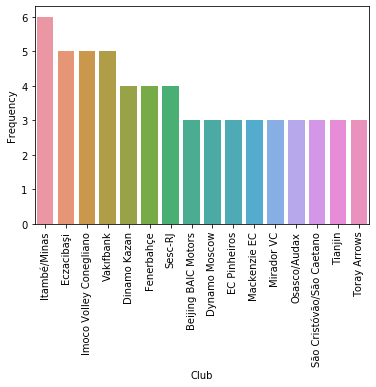

In [695]:
sns.barplot("Club", "Frequency", data= sorted_clubs)
plt.xticks(rotation=90)
plt.show()

#### At the end, age and height are not the main factors in determining the total score. Position, Nationality and the Clubs distributions can show us there is a dominance for some positions, countries and clubs to have better rankings.